In [2]:
# about autograd
import torch
from torch.autograd import Variable

In [8]:
# normal use: loss = f(x), loss 是标量，通过backward，对所有依赖变量生成grad
x = Variable(torch.Tensor([1, 2, 3]), requires_grad=True)
y = x.dot(x)/2.0
print x.data.tolist(), y.data.tolist()

y.backward()
print x.grad.data

# 如果不清零，则下次grad会重复迭代计算
y = x.dot(x)/2.0
y.backward()
print x.grad.data
# 为下一次更新做准备，一般进行grad清零操作
x.grad.data.zero_()
print x.grad

[1.0, 2.0, 3.0] [7.0]

 1
 2
 3
[torch.FloatTensor of size 3]


 2
 4
 6
[torch.FloatTensor of size 3]

Variable containing:
 0
 0
 0
[torch.FloatTensor of size 3]



In [9]:
# 对于向量，也可以进行 backward，但是需要输入进入的梯度：即每个坐标的梯度
x0 = Variable(torch.Tensor([1, 2, 3]), requires_grad=True)
x1 = x0.add(x0.pow(2))
x1.backward(torch.Tensor([2, 2, 2]))
print x0.grad, (x0*2 + 1)*2

Variable containing:
  6
 10
 14
[torch.FloatTensor of size 3]
 Variable containing:
  6
 10
 14
[torch.FloatTensor of size 3]



In [10]:
# 进行register_hook: 改变梯度
x0 = Variable(torch.Tensor([1, 2, 3]), requires_grad=True)
# x1 = Variable(torch.Tensor([1, 2, 3]), requires_grad=True)
x1 = x0.add(x0.pow(2))
h = x0.register_hook(lambda x: x*10)
x1.backward(torch.Tensor([2, 2, 2]))
print x0.grad
h.remove()

Variable containing:
  60
 100
 140
[torch.FloatTensor of size 3]



In [11]:
# 可以对中间变量加入hook，但是注意会改变回流的梯度值，除非返回自身或者None
print '----> no hook:'
x0 = Variable(torch.Tensor([1, 2, 3]), requires_grad=True)
x1 = x0.add(x0.pow(2))
y = x1.sum()
y.backward()
print 'x1_grad = None: ', x1.grad
print x0.grad

----> no hook:
x1_grad = None:  None
Variable containing:
 3
 5
 7
[torch.FloatTensor of size 3]



In [12]:
print '-----> with hook to x1, print result, and return self'
grad_list = []
def hook(grad):
    print grad
    return grad

x0 = Variable(torch.Tensor([1, 2, 3]), requires_grad=True)
x1 = x0.add(x0.pow(2))
y = x1.sum()
h = x1.register_hook(hook)
y.backward()
print 'x1_grad = None: ', x1.grad
print x0.grad
h.remove()

-----> with hook to x1, print result, and return selfVariable containing:
 1
 1
 1
[torch.FloatTensor of size 3]


x1_grad = None:  None
Variable containing:
 3
 5
 7
[torch.FloatTensor of size 3]



In [13]:
print '-----> with hook to x1, print result, and return None is also ok'
grad_list = []
def hook(grad):
    print grad
    return None

x0 = Variable(torch.Tensor([1, 2, 3]), requires_grad=True)
x1 = x0.add(x0.pow(2))
y = x1.sum()
h = x1.register_hook(hook)
y.backward()
print 'x1_grad = None: ', x1.grad
print x0.grad
h.remove()

-----> with hook to x1, print result, and return None is also ok
Variable containing:
 1
 1
 1
[torch.FloatTensor of size 3]

x1_grad = None:  None
Variable containing:
 3
 5
 7
[torch.FloatTensor of size 3]



In [14]:
print '-----> with hook to x1, print result, and return None is also ok'
grad_list = []
def hook(grad):
    print grad
    return None

x0 = Variable(torch.Tensor([1, 2, 3]), requires_grad=True)
x1 = x0.add(x0.pow(2))
y = x1.sum()
h = x1.register_hook(hook)
y.backward()
print 'x1_grad = None: ', x1.grad
print x0.grad
h.remove()

-----> with hook to x1, print result, and return None is also ok
Variable containing:
 1
 1
 1
[torch.FloatTensor of size 3]

x1_grad = None:  None
Variable containing:
 3
 5
 7
[torch.FloatTensor of size 3]



In [15]:
print '-----> with hook to x1, print result, and return other things will change grad'
grad_list = []
def hook(grad):
    print grad
    return grad*0

x0 = Variable(torch.Tensor([1, 2, 3]), requires_grad=True)
x1 = x0.add(x0.pow(2))
y = x1.sum()
h = x1.register_hook(hook)
y.backward()
print 'x1_grad = None: ', x1.grad
print x0.grad
h.remove()

-----> with hook to x1, print result, and return other things will change grad
Variable containing:
 1
 1
 1
[torch.FloatTensor of size 3]

x1_grad = None:  None
Variable containing:
 0
 0
 0
[torch.FloatTensor of size 3]



In [16]:
# self defined function: define forward and backward
from torch.autograd import Function
class self_define_func(Function):
    def forward(self, input_tensor):
        self.save_for_backward(input_tensor)
        return input_tensor.pow(2) + input_tensor
    
    def backward(self, grad_out):
        save_res, = self.saved_tensors
        return grad_out.clone() * (2*save_res+1)

self_func = self_define_func()
x0 = Variable(torch.Tensor([1, 2, 3]), requires_grad=True)
x1 = self_func(x0)
y = x1.sum()
y.backward()
print x0.grad

Variable containing:
 3
 5
 7
[torch.FloatTensor of size 3]



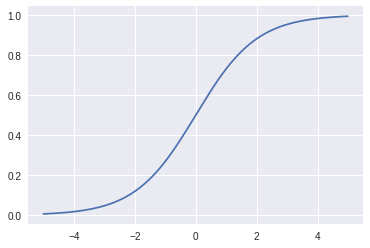

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn
%matplotlib inline
def plot_func(func, xmin=-2, xmax=2):
    x = np.arange(xmin, xmax, 0.01)
    y = np.vectorize(func)(x)
    plt.plot(x, y)
    
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

plot_func(sigmoid, -5, 5)
plt.show()